<h1>                      Liner Regression</h1>

<h2>1- Basit Doğrusal Regressyon</h2>

Temel amaç, bağmlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

Modellemek, çeşitli kavramlar arasındaki ilişkileri belirli matematiksel formlarda ifade etmek demektir.

en son elde edeceğimiz form:      <strong>yi'=b0+b1*xi</strong> şeklinde olur.
- yi'->tahmin etmek istediğimiz değer
- b0,b1->modelin bulacağı katsayılar
- xi->bağımsız değişken

 <strong>Anakitle Modeli:Y=ß0+ß1X+£</strong>
 - ß0->Doğrunu y eksenini kestiği nokta
 - ß1->Doğrunun eğimi
 - £->Hata Terimi
 
 <strong>Örneklem Modeli:yi=b0+b1*ei</strong>
 - ei=yi-yi = yi-(b0+b1*xi)
 
 <strong>Tahmin Modeli: yi'=b0+b1*xi</strong>
 
 SSE=∑(yi-yi')^2(Hata Kareleri Toplamı i=1 to n)
 
 SSE=∑(yi-(b0+b1*xi)^2
 <img src="image/LG1.JPG">

<h3>Model</h3>

In [145]:
import pandas as pd
#veri seti yapılan reklamlara göre satışları göstermektedir
df=pd.read_csv("data/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [146]:
#veri analizi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


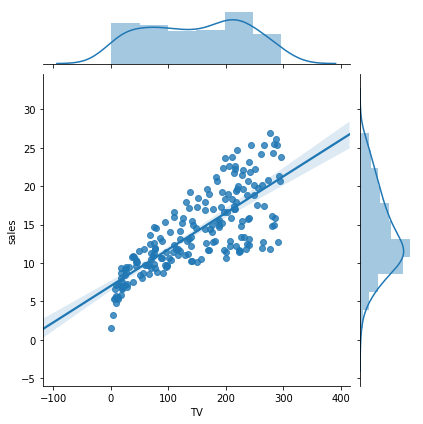

In [147]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

Grafik Yorumu: Tv reklamları artıkça satışlar artmıştır.

In [148]:
from sklearn.linear_model import LinearRegression
X=df[["TV"]]#bağımsız değişken
Y=df[["sales"]]#bağımlı değişken


reg=LinearRegression()
model=reg.fit(X,Y)

In [150]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [151]:
b0=model.intercept_#b0 değeri
b1=model.coef_#b1 değeri
print("b0:",b0)
print("b1:",b1)

b0: [7.03259355]
b1: [[0.04753664]]


<strong>rkare(R-square)</strong>:Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir


In [152]:
model.score(X,Y)

0.611875050850071

<h3>Tahmin</h3>

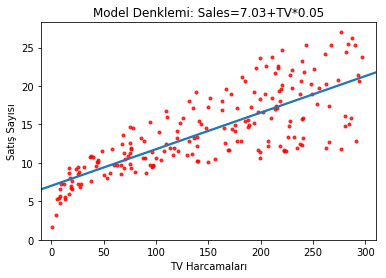

In [153]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
g=sns.regplot(X,Y,ci=None,scatter_kws={"color":"r","s":9})
g.set_title("Model Denklemi: Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales=7.03 + 0.05*TV

In [154]:
#öneğin 165 birimlik TV harcaması yaparsak, satışta kaç birimlik artış olur
b0+b1*165

array([[14.87613922]])

In [155]:
model.predict([[165]])

array([[14.87613922]])

In [156]:
#Çoklu Tahmin Yapma
harcamalar=[[5],[15],[30]]
model.predict(harcamalar)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

<h3>Artıklar(hatalar) ve Makine Öğrenmesindeki Önemi</h3>

<strong> MSE: Hata Kareler Ortalaması</strong>

<strong>RMSE: Hata Kareler Ortalamasının Karekökü </strong>

In [157]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [158]:
gercek_y=Y[0:10]
tahmin_y=pd.DataFrame(model.predict(X)[0:10])
hatalar=pd.concat([gercek_y,tahmin_y],axis=1)
hatalar.columns=["gerçek_y","tahmin_y"]
hatalar

,gerçek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [159]:
hatalar["hata"]=hatalar["gerçek_y"]-hatalar["tahmin_y"]
hatalar

,gerçek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [160]:
hatalar["hata_kare"]=hatalar["hata"]**2
hatalar

,gerçek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [161]:
#hata Kareler ortalaması,elde ettiğimiz ortalama hata
np.mean(hatalar["hata_kare"])

9.290350329638105

<h2>2- Çoklu Doğrusal Regressyon</h2>
	  
yi=β0 +β1*xi1+β2*xi2 +...+βpx*ip 

In [162]:
import pandas as pd
#veri seti yapılan reklamlara göre satışları göstermektedir
df=pd.read_csv("data/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [163]:
X=df.drop('sales',axis=1)#bağımsız değişkenler
Y=df[["sales"]]#bağımlı değişken

In [164]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [165]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


<h3>Model</h3>

<h4>1-StatsModels ile Model Kurmak</h4>

In [166]:
import statsmodels.api as sm #kütüphane

In [167]:
lm=sm.OLS(Y,X)#lineer model
model=lm.fit()
model.summary()#model özeti

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                   2.43e-171
Time:                        18:39:11   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>2-Scikit-Learn ile Model Kurma</h4>

In [168]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X,Y)

In [169]:
b0=model.intercept_
bi=model.coef_#i=değişken 1 to değişken sayısı
print("b0:",b0)
print("bi:",bi)

b0: [2.93888937]
bi: [[ 0.04576465  0.18853002 -0.00103749]]


<h3>Tahmin</h3>
Sales=2.94+TV*0.004+radio*0.19-newspaper*0.001

S:) 30 birim tb,10 birim radio harcamsı,40 birim gazete harcaması olursa satışlar ne olur

In [170]:
tahmin=b0+bi[0,0]*30+bi[0,1]*10+bi[0,2]*40
print("tahmin",tahmin)

tahmin [6.15562918]


In [171]:
veri=[[30],[10],[40]]
veri=pd.DataFrame(veri).T
veri

,0,1,2
0,30,10,40


In [172]:
model.predict(veri)

array([[6.15562918]])

In [173]:
#modelin başarısının değerlendirilmesi
from sklearn.metrics import mean_squared_error
y_tahmin=pd.DataFrame(model.predict(X))
y_tahmin_gercek=pd.concat([Y,y_tahmin],axis=1)
y_tahmin_gercek.columns=["y_gercek","y_tahmin"]
y_tahmin_gercek.head()

,y_gercek,y_tahmin
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672


In [174]:
mse=mean_squared_error(Y,y_tahmin)
rmse=np.sqrt(mse)#root mean square error
print("hata kareler ortalaması:",mse)
print("hata kareler ortalaması karekökü:",rmse)

hata kareler ortalaması: 2.784126314510936
hata kareler ortalaması karekökü: 1.6685701407225697


<h3> Çoklu Doğrusal Regressyon Model Optimizasyonu(Model Tuning)<h/3>

<h4>Model Doğrulama</h4>

In [175]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [176]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [177]:
#1- sınama seti
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=99)
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [178]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [179]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)
rmse_egitim=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
print("rmse eğitim:",rmse_egitim)

rmse eğitim: 1.7236824822650751


In [180]:
rmse_test=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print("rmse test:",rmse_test)

rmse test: 1.4312783138301641


<h5>2-K-katlı Cross Validation</h5>

Literatürde k-fold cross validation (k katlamalı Çapraz doğrulama) olarak geçmektedir, makine öğrenme modellerinin başarılarının değerlendirilmesi için kullanılan bir yöntemdir. Bu yöntemde veri seti eğitim ve test seti olarak ayrılmaktadır bu işlem için seçilen yöntem modelin başarısını önemli ölçüde etkilemektedir
<img src="image/k_kros.JPG">
konu için bu linke gidebilirsiniz: https://www.veribilimiokulu.com/bir-bakista-k-fold-cross-validation/

In [181]:
from sklearn.model_selection import cross_val_score
rmse_cv=np.sqrt(-np.mean(cross_val_score(model,X_train,y_train,
                                         cv=10,scoring="neg_mean_squared_error")))
mse_cv=-np.mean(cross_val_score(model,X_train,y_train,
                                         cv=10,scoring="neg_mean_squared_error"))
print("cross validation rmse:",rmse_cv)
print("cross validation mse:",mse_cv)

cross validation rmse: 1.821271252239525
cross validation mse: 3.317028974234127


<h2>3- Ridge Regression </h2>

amaç kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır 
<img src="image/Ridge_reg.JPG">
- Aşırı öğrenmeye karşı dirençlidir.
- Yanlıdır fakat varyansı düşüktür.(Bazen Yanlı modelleri daha çok tercih ederiz)
- Çok fazla parametre olduğunda EEK(klasik regresyon)'ya göre daha iyidir.
- Çok boyutluluk lanetine karşı çözüm sunar.
- Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
- Tüm değişkenler ile model kurar. İlgisiz değişkenleri modeldençıkarmaz, katsayılarını sıfıra yaklaştırır.
- landa krtitk Önemdedir.iki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
- landa için iyi bir değer bulunması önemlidir. bunun için CV(Cross-Validation) yöntemi kullanılır.
<img src="image/Ridge_reg1.JPG">

HKT->Hata Kareler Toplamı
EKK->en küçük kareler

<h4>Uygulama</h4>

In [182]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [183]:
#dataset beyzbol ile ilgili
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin için çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


<h3>Model</h3>

In [184]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)#alpha=landa
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [185]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [186]:
#farklı landa değişimlerine karşılık katsayılaın değişimi
lambdalar=10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [187]:
ridge_model=Ridge()
katsayılar=[]
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

katsayılar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

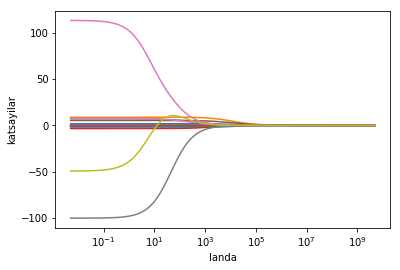

In [188]:
ax=plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")
ax.set_xlabel("landa")
ax.set_ylabel("katsayilar");

grafik farklı landa değerlerine karşılık beta değerlerinin nasıl değiştiğini göstermektedir.

<h3>Tahmin</h3>

In [189]:
ridge_model=Ridge().fit(X_train,y_train)
y_tahmin=pd.DataFrame(ridge_model.predict(X_train))
y_tahmin_gercek=pd.concat([y_train,y_tahmin],axis=1)
y_tahmin_gercek.columns=["gerçek y","tahmini y"]
y_tahmin_gercek.head()

,gerçek y,tahmini y
0,NaN,376.252454
1,475.0,803.384981
2,480.0,496.176697
3,500.0,112.695546
4,91.5,427.600202


<h5>Train Hatası</h5>

In [190]:
RMSE=np.sqrt(mean_squared_error(y_train,y_tahmin))
print("RMSE:",RMSE)

RMSE: 289.34470696006565


In [191]:
rmse_cv=np.sqrt(-np.mean(cross_val_score(ridge_model,X_train,y_train,
                                         cv=10,scoring="neg_mean_squared_error")))
print("rmse:",rmse_cv)

rmse: 351.3931585606317


<h5>Test Hatası</h5>

In [192]:
y_tahmin=pd.DataFrame(ridge_model.predict(X_test),columns=["test tahmin"])
y_tahmin[:5]

,test tahmin
0,610.656172
1,693.026009
2,1015.187979
3,408.935384
4,420.806669


In [193]:
RMSE=np.sqrt(mean_squared_error(y_test,y_tahmin))
print("RMSE:",RMSE)

RMSE: 356.8082905730238


<h4>Model Tuning</h4>

In [194]:
#Problem: En uygun landa değerini bulalım
ridge_model=Ridge().fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 356.8082905730238


In [195]:
lambdalar1=np.random.randint(0,1000,100)
lambdalar2=10**np.linspace(10,-2,100)*0.5

In [196]:
#labdalar2 yerine lambdalar1 yazıp te en uygun değeri bulabiliriz
ridgecv=RidgeCV(alphas=lambdalar2,scoring="neg_mean_squared_error",
                cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [197]:
#modelin içindeki optimum landa yada alpha değeri
ridgecv.alpha_

0.7599555414764666

In [198]:
#final modeli
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)
y_pred=ridge_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 356.8583047271521


<h2>4-Lasso Regresyon</h2>

amaç kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır
<img src="image/lasso.JPG">
- Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
- lassoda katsayılar sıfıra yaklaştırılır.
- fakat L1 normu landa yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapılmış olur.
- landanın doğru seçilmesi çok önemlidir,burada da CV kullanılır.
- Ridge ve Lasso yöntemleri birbirinden üstün değildir.
<img src="image/lasso1.JPG">

<h3>Model</h3>

In [199]:
#kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV

In [202]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin için çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [203]:
lasso=Lasso().fit(X_train,y_train)
lasso

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
lasso.intercept_

-5.587450677336733

In [205]:
lasso.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [206]:
#farklı landa değerlerine kaşılık katsayı değerleri

In [207]:
alphas=10**np.linspace(10,-2,100)*0.5
lasso=Lasso()
coefs=[]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)


D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935673922, tolerance: 3898.686956380658
  po

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247747.060921359, tolerance: 3898.686956380658
  positive)


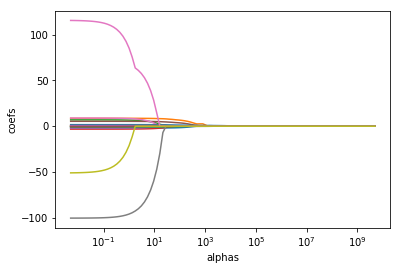

In [208]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")
ax.set_xlabel("alphas")
ax.set_ylabel("coefs");

<h3>Tahmin</h3>

In [209]:
lasso_model=Lasso().fit(X_train,y_train)
y_pred=pd.DataFrame(lasso_model.predict(X_test))

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [210]:
y_pred[0:5]

,0
0,609.188264
1,696.968107
2,1009.061574
3,412.227734
4,409.258517


In [213]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 356.0975884554033


In [214]:
r2_scoree=r2_score(y_test,y_pred)
print("r2_score:",r2_scoree)

r2_score: 0.4142279813236619


<h3>Model Tuning</h3>

In [215]:
#version 1
lasso_cv_model=LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)

In [216]:
lasso_cv_model.alpha_

563.4670501833854

In [217]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred=lasso_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 373.5957225069793


In [218]:
#version 2
lambdalar2=10**np.linspace(10,-2,100)*0.5
lasso_cv_model=LassoCV(alphas=lambdalar2,cv=10,
                       max_iter=100000).fit(X_train,y_train)

In [219]:
lasso_cv_model.alpha_

201.85086292982749

In [221]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred=lasso_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 363.6832708037446


In [222]:
#bazı değişkenlere ait kat sayıların sıfırlandığını gözlemleyelim
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

<h2>5-ElasticNet Regresyon</h2>
amaç kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.

- ElastikNet Lasso ve Ridge yaklaşımlarını birleştirir.
<img src="image/elastik.JPG">

<h3>Model ve Tahmin</h3>

In [223]:
#kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [224]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin için çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [225]:
elastic_model=ElasticNet().fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [228]:
elastic_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [229]:
elastic_model.intercept_

-6.465955602113127

In [230]:
#tahmin
y_pred=elastic_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 357.1676548181244


In [231]:
r2_scoree=r2_score(y_test,y_pred)
print("r2_score:",r2_scoree)

r2_score: 0.41070222469326945


<h3>Model Tuning</h3>

In [232]:
elastic_cv_model=ElasticNetCV(cv=10).fit(X_train,y_train)
elastic_cv_model.alpha_

5230.7647364798695

In [233]:
elastic_cv_model.intercept_

-38.5194055839429

In [234]:
elastic_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [235]:
#final model version 1
elastic_model_tuned=ElasticNet(alpha=elastic_cv_model.alpha_).fit(X_train,y_train)
y_pred=elastic_model_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 394.15280563218795


In [236]:
#final model version 2
lambdalar2=10**np.linspace(10,-2,100)*0.5
elastic_cv_model=ElasticNetCV(alphas=lambdalar2,cv=10).fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.948308315128, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.0031534601, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424800049514, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6750665.369367819, tolerance: 3214.815928601271
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6761964.2090484025, tolerance: 3214.815928601271
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6770192.132226571, tolerance: 3214.815928601271
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7058050.445135582, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7076979.857942614, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7105751.217323357, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7598803.37461814, tolerance: 3693.906712970403
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7628772.887987093, tolerance: 3693.906712970403
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7647769.367433683, tolerance: 3693.906712970403
  tol, rng, random, positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

In [237]:
elastic_cv_model.alpha_

5748.784976988678

In [238]:
elastic_tuned=ElasticNet().set_params(alpha=elastic_cv_model.alpha_).fit(X_train,y_train)

In [239]:
y_pred=lasso_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:",RMSE)

Test RMSE: 363.6832708037446


In [240]:
?ElasticNet